# 4장 넘파이 4편

## 주요 내용

- 선형대수
- 난수 생성
- 프로젝트: 계단 오르내리기

## 기본 설정

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np
# 램덤 시드
np.random.seed(12345)
# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt
# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 4.5 선형 대수 (p. 172)

행렬 곱셈, 전치 행렬, 역행렬 등을 2차원 어레이로 계산하는 방식을 
간단한 예제를 이용하여 소개한다.

#### 행렬곱

먼저 두 개의 행렬을 2차원 어레이로 구현하자.
행렬 `x`는 (2, 3) 모양의 2차원 어레이다.

$$
\text{x} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

In [2]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

행렬 `y`는 (3, 2) 모양의 2차원 어레이다.

$$
\text{y} = 
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
$$

In [3]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

두 행렬의 곱 `x y`는 `dot()` 메서드를 이용하여 구한다.
결과는 (2, 2) 모양의 어레이다.

$$
\text{x y} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
=
\begin{bmatrix}
28 & 64\\
67 & 181
\end{bmatrix}
$$

In [4]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

`np.dot()` 함수를 이용해도 동일한 결과를 얻는다.

In [5]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

#### `@` 연산자

`np.dot()` 함수 대신 `@` 기호를 중위 연산자로 사용할 수 있다.

In [6]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

#### 전치 행렬

전치 행렬은 전치 어레이로 구현된다.

In [7]:
x.T

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

In [8]:
y.T

array([[ 6., -1.,  8.],
       [23.,  7.,  9.]])

`x y`의 전치 행렬은 `y`의 전치 행렬과 `x`의 전치 행렬의 곱이다.

In [9]:
((x @ y).T == y.T @ x.T).all()

True

#### 역행렬

역행렬은 `numpy.linalg` 모듈에 포함된 `inv()` 함수를 이용하여 구한다.

In [10]:
from numpy.linalg import inv

X = np.random.randn(5, 5)
X

array([[-0.2047,  0.4789, -0.5194, -0.5557,  1.9658],
       [ 1.3934,  0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289,  1.3529],
       [ 0.8864, -2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212, -0.5771]])

In [11]:
inv(X)

array([[-1.1204,  0.3601,  0.8442, -0.8895, -0.3836],
       [ 0.0305,  0.4635, -0.5186, -0.1366, -0.0071],
       [ 0.1984,  0.1362, -0.1729,  0.2543,  0.3714],
       [ 0.8541,  0.4155, -1.15  ,  1.044 ,  0.3173],
       [ 0.6785,  0.078 , -0.1565,  0.303 ,  0.1496]])

`X @ (inv(X))` 거의 항등 함수로 계산된다.

__참고:__ 컴퓨터를 이용한 부동소수점 연산은 완벽함과 거리가 아주 멀다.

In [12]:
X @ (inv(X))

array([[ 1.,  0., -0.,  0.,  0.],
       [-0.,  1., -0.,  0., -0.],
       [ 0., -0.,  1., -0., -0.],
       [ 0., -0., -0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

`numpy.linalg` 모듈에서 제공하는 선형대수 관련 함수들은 [NumPy: 선형 대수](https://numpy.org/doc/stable/reference/routines.linalg.html)에서 
찾아볼 수 있다.

## 4.6 난수 생성 (p. 174)

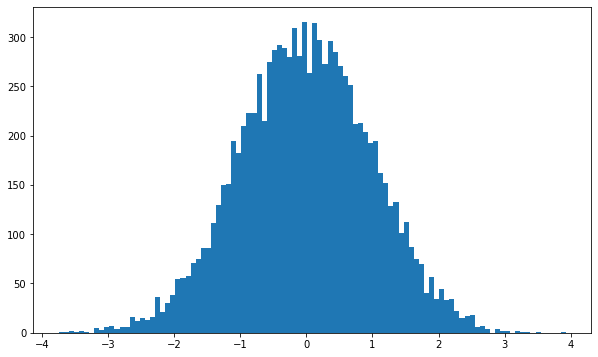

In [13]:
samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

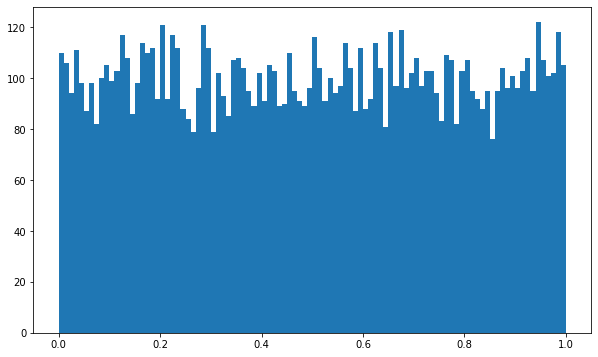

In [14]:
samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

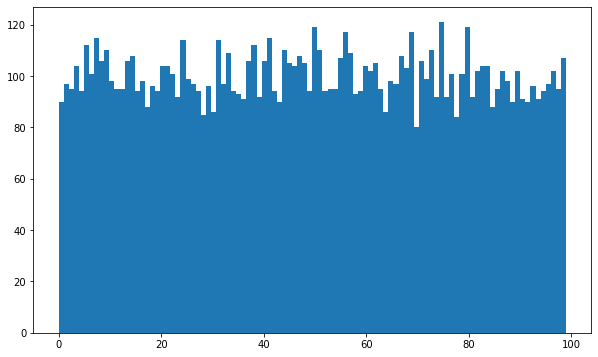

In [15]:
samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

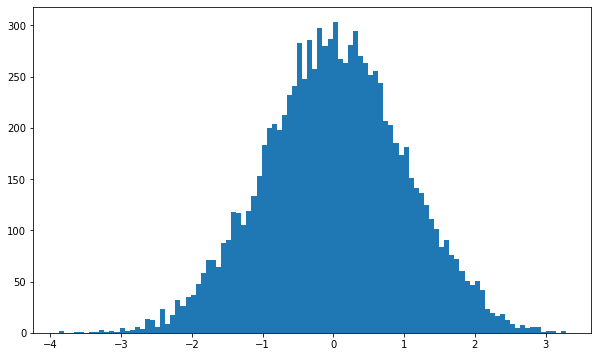

In [16]:
np.random.seed(1234)

samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

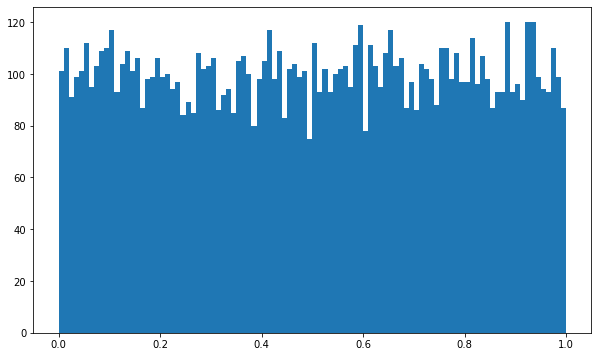

In [17]:
np.random.seed(1234)

samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

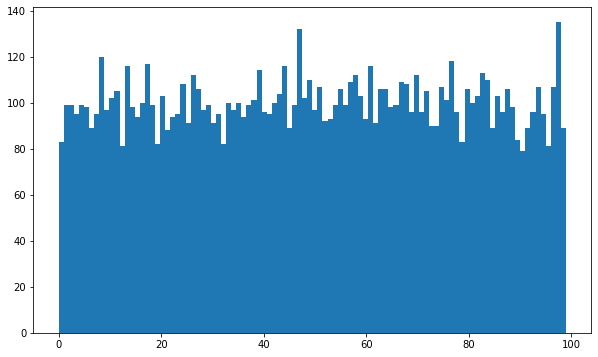

In [18]:
np.random.seed(1234)

samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

## 4.7 예제: 계단 오르기(Random Walks)

- 176쪽

In [19]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [20]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

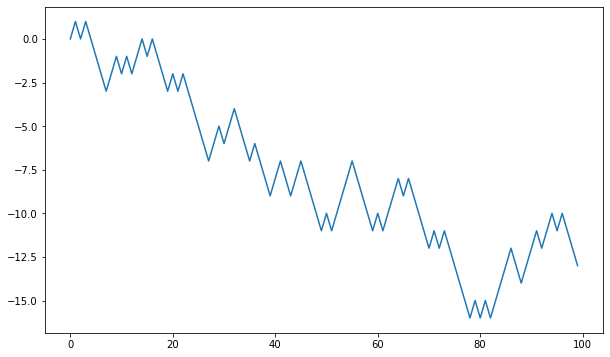

In [21]:
plt.plot(walk[:100])

In [22]:
np.random.seed(12345)

In [23]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [24]:
walk.min()
walk.max()

31

In [25]:
(np.abs(walk) >= 10).argmax()

37

### 4.7.1 한 번에 여러 계단 오르기

- 178쪽

In [26]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [27]:
walks.max()
walks.min()

-133

In [28]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [29]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [30]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))